<a href="https://colab.research.google.com/github/Muppasaisrija/Muppa_NFO5731_-SPRING2022/blob/main/INFO5731_Assignment_Three_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv( "/content/tweet_data.csv",encoding='latin1')
N = 3

def frequency(N, df):
    ngram = []
    for i in range(len(df)):
        ngram.append(df.iloc[i]['text'].split())
    ngram = np.array(ngram)
    ngram = ngram.reshape(len(ngram), -1)
    ngram = ngram.tolist()
    ngram = [item for sublist in ngram for item in sublist]

    return ngram

frequency(N, df)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # Remove the CWD from sys.path while we load stuff.


[['Robbie',
  'E',
  'Responds',
  'To',
  'Critics',
  'After',
  'Win',
  'Against',
  'Eddie',
  'Edwards',
  'In',
  'The',
  '#WorldTitleSeries',
  'https://t.co/NSybBmVjKZ'],
 ['\x89ÛÏIt',
  'felt',
  'like',
  'they',
  'were',
  'my',
  'friends',
  'and',
  'I',
  'was',
  'living',
  'the',
  'story',
  'with',
  'them\x89Û\x9d',
  'https://t.co/arngE0YHNO',
  '#retired',
  '#IAN1',
  'https://t.co/CIzCANPQFz'],
 ['i',
  'absolutely',
  'adore',
  'when',
  'louis',
  'starts',
  'the',
  'songs',
  'it',
  'hits',
  'me',
  'hard',
  'but',
  'it',
  'feels',
  'good'],
 ['Hi',
  '@JordanSpieth',
  '-',
  'Looking',
  'at',
  'the',
  'url',
  '-',
  'do',
  'you',
  'use',
  '@IFTTT?!',
  "Don't",
  'typically',
  'see',
  'an',
  'advanced',
  'user',
  'on',
  'the',
  '@PGATOUR!',
  'https://t.co/H68ou5PE9L'],
 ['Watching',
  'Neighbours',
  'on',
  'Sky+',
  'catching',
  'up',
  'with',
  'the',
  'Neighbs!!',
  'Xxx',
  '_Ù÷Ä_Ù÷Ä_Ù÷Ä_ÙÔÎ_Ù\x8fÈ_ÙÔ\x8d_Ù\x8fÈ',
  'Xxx'

In [ ]:
def probability(N, df):
    ngram = []
    for i in range(len(df)):
        ngram.append(df.iloc[i]['text'].split())
    ngram = np.array(ngram)
    ngram = ngram.reshape(len(ngram), -1)
    ngram = ngram.tolist()
    ngram = [item for sublist in ngram for item in sublist]

    count = {}
    for i in range(len(ngram)):
        if ngram[i] in tuple(count):
            count[ngram[i]] += 1
    count = sorted(count.items(), key=lambda x: x[1], reverse=True)
    count = count[:1000]
    count = np.array(count)
    count = count.tolist()

    for i in range(len(count)):
        count[i][1] = count[i][1] / count[i][0]

    return count
probability(N, df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


[]

In [ ]:
def extract_noun():
    noun = []
    for i in range(len(df)):
        noun.append(df.iloc[i]['text'].split())
    noun = np.array(noun)
    noun = noun.reshape(len(noun), -1)
    noun = noun.tolist()
    noun = [item for sublist in noun for item in sublist]
    noun = [item for item in noun]
    noun = [item for item in noun if len(item) > 2]
    noun = [item for item in noun if item not in ['a', 'the', 'an', 'is', 'are', 'was', 'were', 'am', 'i', 'my', 'me', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he'] ]

    return noun

extract_noun()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


[['Robbie',
  'E',
  'Responds',
  'To',
  'Critics',
  'After',
  'Win',
  'Against',
  'Eddie',
  'Edwards',
  'In',
  'The',
  '#WorldTitleSeries',
  'https://t.co/NSybBmVjKZ'],
 ['\x89ÛÏIt',
  'felt',
  'like',
  'they',
  'were',
  'my',
  'friends',
  'and',
  'I',
  'was',
  'living',
  'the',
  'story',
  'with',
  'them\x89Û\x9d',
  'https://t.co/arngE0YHNO',
  '#retired',
  '#IAN1',
  'https://t.co/CIzCANPQFz'],
 ['i',
  'absolutely',
  'adore',
  'when',
  'louis',
  'starts',
  'the',
  'songs',
  'it',
  'hits',
  'me',
  'hard',
  'but',
  'it',
  'feels',
  'good'],
 ['Hi',
  '@JordanSpieth',
  '-',
  'Looking',
  'at',
  'the',
  'url',
  '-',
  'do',
  'you',
  'use',
  '@IFTTT?!',
  "Don't",
  'typically',
  'see',
  'an',
  'advanced',
  'user',
  'on',
  'the',
  '@PGATOUR!',
  'https://t.co/H68ou5PE9L'],
 ['Watching',
  'Neighbours',
  'on',
  'Sky+',
  'catching',
  'up',
  'with',
  'the',
  'Neighbs!!',
  'Xxx',
  '_Ù÷Ä_Ù÷Ä_Ù÷Ä_ÙÔÎ_Ù\x8fÈ_ÙÔ\x8d_Ù\x8fÈ',
  'Xxx'

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [ ]:
# Write your code here\
def doc_terms_matrix_bold(df):
    #calculate idf
    idf = {}
    for i in range(len(df)):
        for word in df.iloc[i]['text'].split():
            if word in idf:
                idf[word] += 1
            else:
                idf[word] = 1
    idf = {k: np.log(len(df) / v) for k, v in idf.items()}

    tf = {}
    for i in range(len(df)):
        for word in df.iloc[i]['text'].split():
            if word in tf:
                tf[word] += 1
            else:
                tf[word] = 1
    tf = {k: v / len(df.iloc[i]['text'].split()) for k, v in tf.items()}

    return tf

doc_terms_matrix_bold

query = "An Outstanding movie with a haunting performance and best character development"
def rank_doc_with_query(query):
    query = query.split()
    query = [item for item in query if item.isalpha()]
    query = [item for item in query if len(item) > 2]
    query = [item for item in query if item.lower() not in ['a', 'the', 'an', 'is', 'are', 'was', 'were', 'am', 'i', 'my', 'me', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your', 'yours', 'he', 'she', 'it', 'they', 'them', 'their', 'we', 'us', 'our', 'ours', 'you', 'your'] ]

    #rank the document
    wight = doc_terms_matrix_bold(df)
    rank = {}
    for i in range(len(wight)):
        rank[i] = 0
        for word in query:
            if word in wight:
                rank[i] += 10
    rank = sorted(rank.items(), key=lambda x: x[1], reverse=True)
    rank = rank[:10]
    rank = np.array(rank)
    rank = rank.tolist()
    return rank

rank_doc_with_query(query)


[[0, 90],
 [1, 90],
 [2, 90],
 [3, 90],
 [4, 90],
 [5, 90],
 [6, 90],
 [7, 90],
 [8, 90],
 [9, 90]]

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 153 samples in 0.000s...
[t-SNE] Computed neighbors for 153 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 153 / 153
[t-SNE] Mean sigma: 1.372756
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.085346
[t-SNE] KL divergence after 1000 iterations: 0.153684


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0,

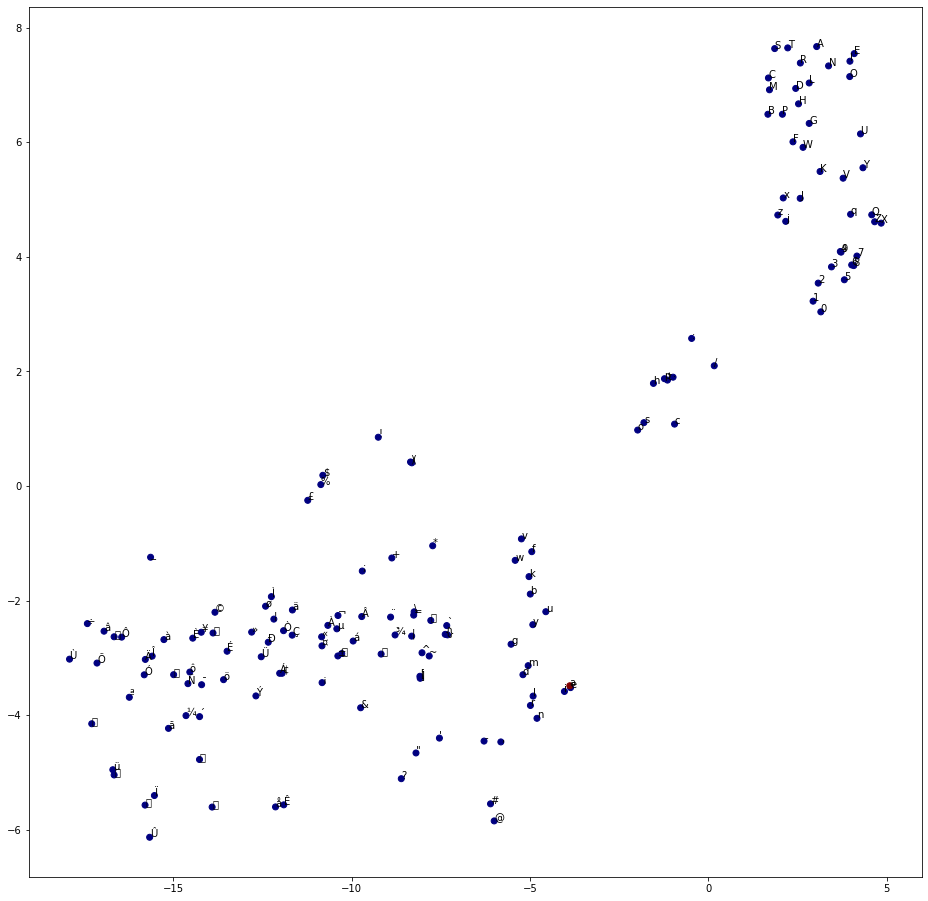

In [ ]:
# Write your code here
from gensim.models import Word2Vec
def train_300_dimention():
    #train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).
    #load data
    df = pd.read_csv( "/content/tweet_data.csv",encoding='latin1')
    #build the documents-terms weights (tf*idf) matrix bold text.
    wight = doc_terms_matrix_bold(df)
    #train word2vec
    model = Word2Vec(wight, size=300, window=5, min_count=5, workers=4)
    return model

train_300_dimention()

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
def visualize_word_embedding(model):
    #visualize the word embedding model you created.
    #load data
    df = pd.read_csv( "/content/tweet_data.csv",encoding='latin1')
    #build the documents-terms weights (tf*idf) matrix bold text.
    wight = doc_terms_matrix_bold(df)
    #train word2vec
    model = Word2Vec(wight, size=300, window=5, min_count=5, workers=4)
    #visualize the word embedding model you created.
    words = list(model.wv.vocab)
    word_vectors = model.wv[words]
    tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
    tsne_w2v = tsne_model.fit_transform(word_vectors)
    df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
    df['words'] = words
    df['labels'] = df['words'].apply(lambda x: 1 if x in ['a', 'the', 'an'] else 0)
    fig, ax = plt.subplots(figsize=(16, 16))
    ax.scatter(x='x', y='y', c='labels', cmap='jet', data=df)
    for i, txt in enumerate(df['words']):
        ax.annotate(txt, (df['x'][i], df['y'][i]))
    plt.show()

visualize_word_embedding(model=train_300_dimention())



# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file

https://github.com/smmohua/INFO-5731/blob/main/tweet_sentiment_analysis.csv

# Link: 



